# selection of valid BrdU nuclei

## setup

### libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import glob
import os

### reading csv

In [46]:
csv_files = glob.glob('supplementary/brdu_data/*.csv')

file_names = [os.path.basename(path) for path in csv_files]

dfs = [pd.read_csv(file, index_col=False) for file in csv_files]

for file, df in zip(file_names, dfs):
    df['source'] = file[:-4]

brdu_df_raw = pd.concat(dfs, ignore_index=True)
print(f'starting cells: {len(brdu_df_raw)}')

starting cells: 21984


### link pics with age

In [47]:
dict_age = {
    'VBm15_1': 12,
    'VBm15_2': 12,
    'VBm15_3': 12,
    'VBm16_1': 13,
    'VBm16_2': 13,
    'VBm16_3': 13,
    'VBm19_4-2': 14,
    'VBm19_5': 14,
    'VBm19_5-2': 14,
    'VBm20_4': 15,
    'VBm20_5': 15,
    'VBm20_5-2': 15,
    'VBm10_2': 16,
    'VBm10_6': 16,
    'VBm10_7': 16
}

brdu_df_raw['age'] = brdu_df_raw['source'].map(dict_age)

qual_palette = sns.color_palette('pastel', 5)

### removing things too big to be nuclei

In [48]:
brdu_df = brdu_df_raw[brdu_df_raw['area'] < 500]

print(f'cells left: {len(brdu_df)}')

cells left: 21601


### area visualization

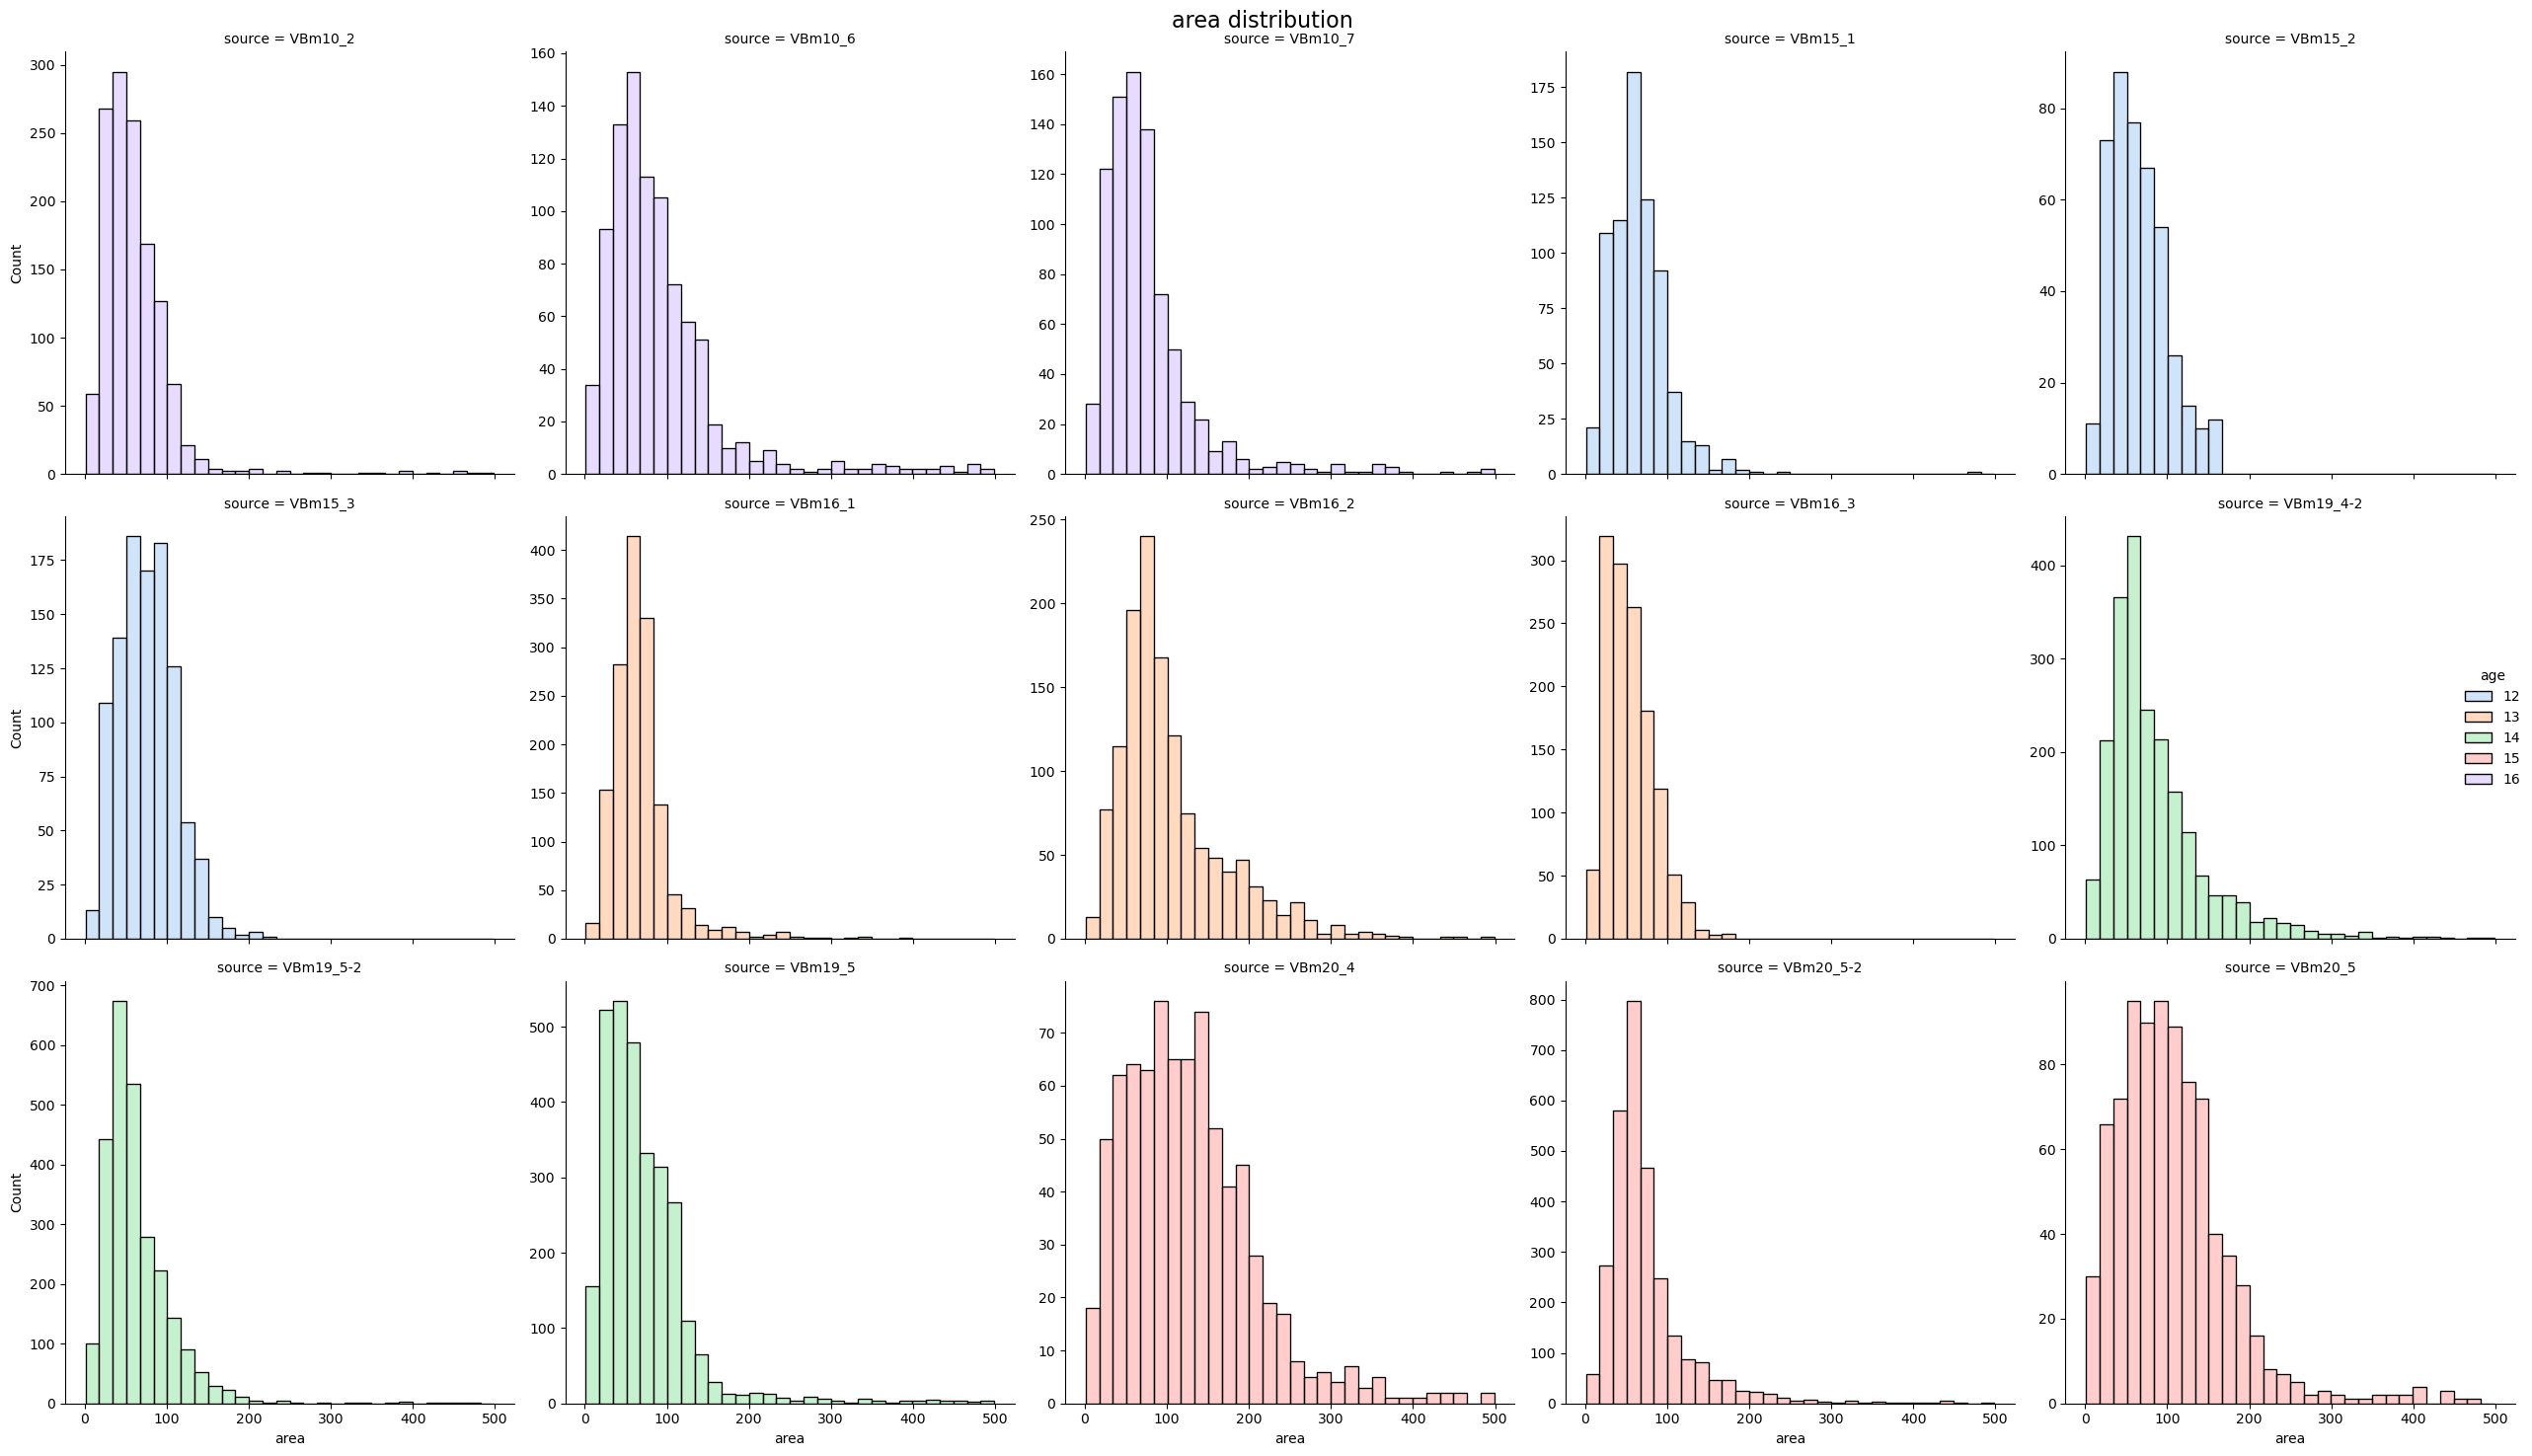

In [49]:
g = sns.displot(
    data=brdu_df,
    x='area',
    col='source',         # Facet by source
    bins=30,
    col_wrap = 5,
    hue = 'age',
    palette=qual_palette,
    facet_kws=dict(sharey=False)  # Optional: don't force same y-axis
)

g.fig.suptitle('area distribution', fontsize=16)
plt.tight_layout()
plt.show()

### BrdU intensity visualization

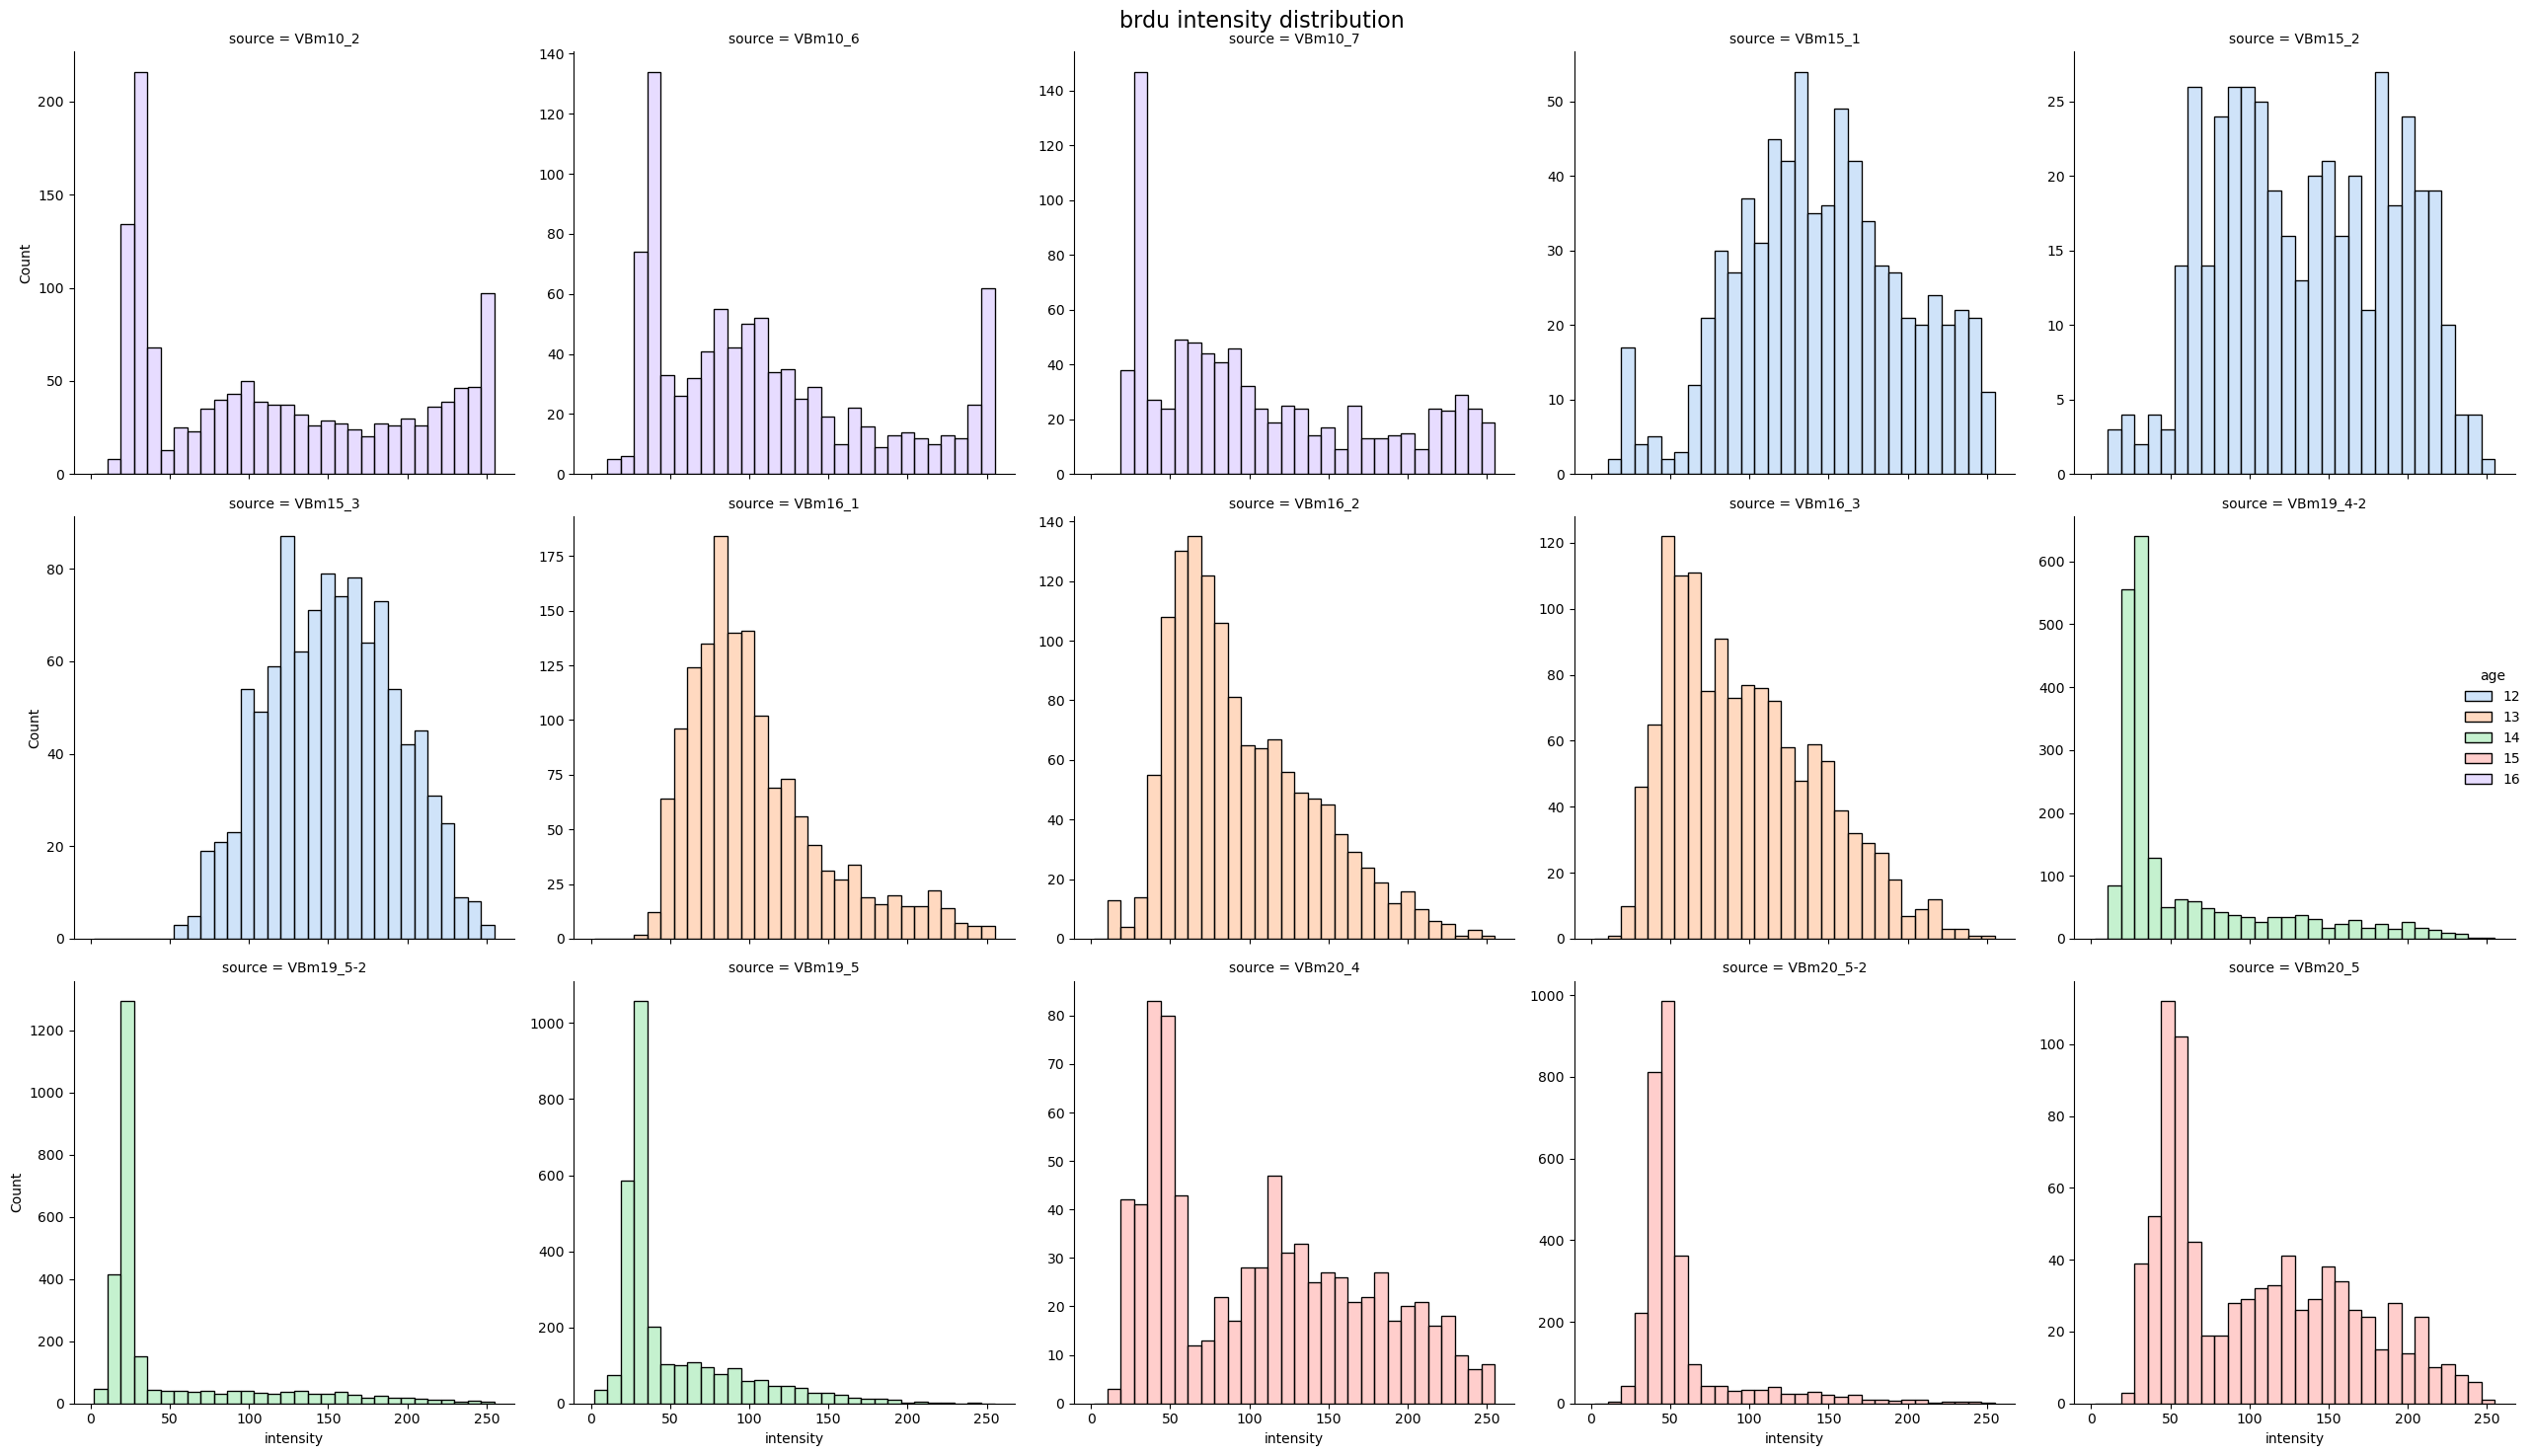

In [50]:
g = sns.displot(
    data=brdu_df,
    x='intensity',
    col='source',         # Facet by source
    bins=30,
    col_wrap = 5,
    hue = 'age',
    palette=qual_palette,
    facet_kws=dict(sharey=False)  # Optional: don't force same y-axis
)

g.fig.suptitle('brdu intensity distribution', fontsize=16)
plt.tight_layout()
plt.show()

## filtering

### filer by size (area > 65)

removing cells that are too small to be proper nuclei

In [51]:
brdu_df_filt = brdu_df[brdu_df['area'] > 65]

print(f'cells left: {len(brdu_df_filt)}')

cells left: 10331


### checking circularity (of cells that are not too small)

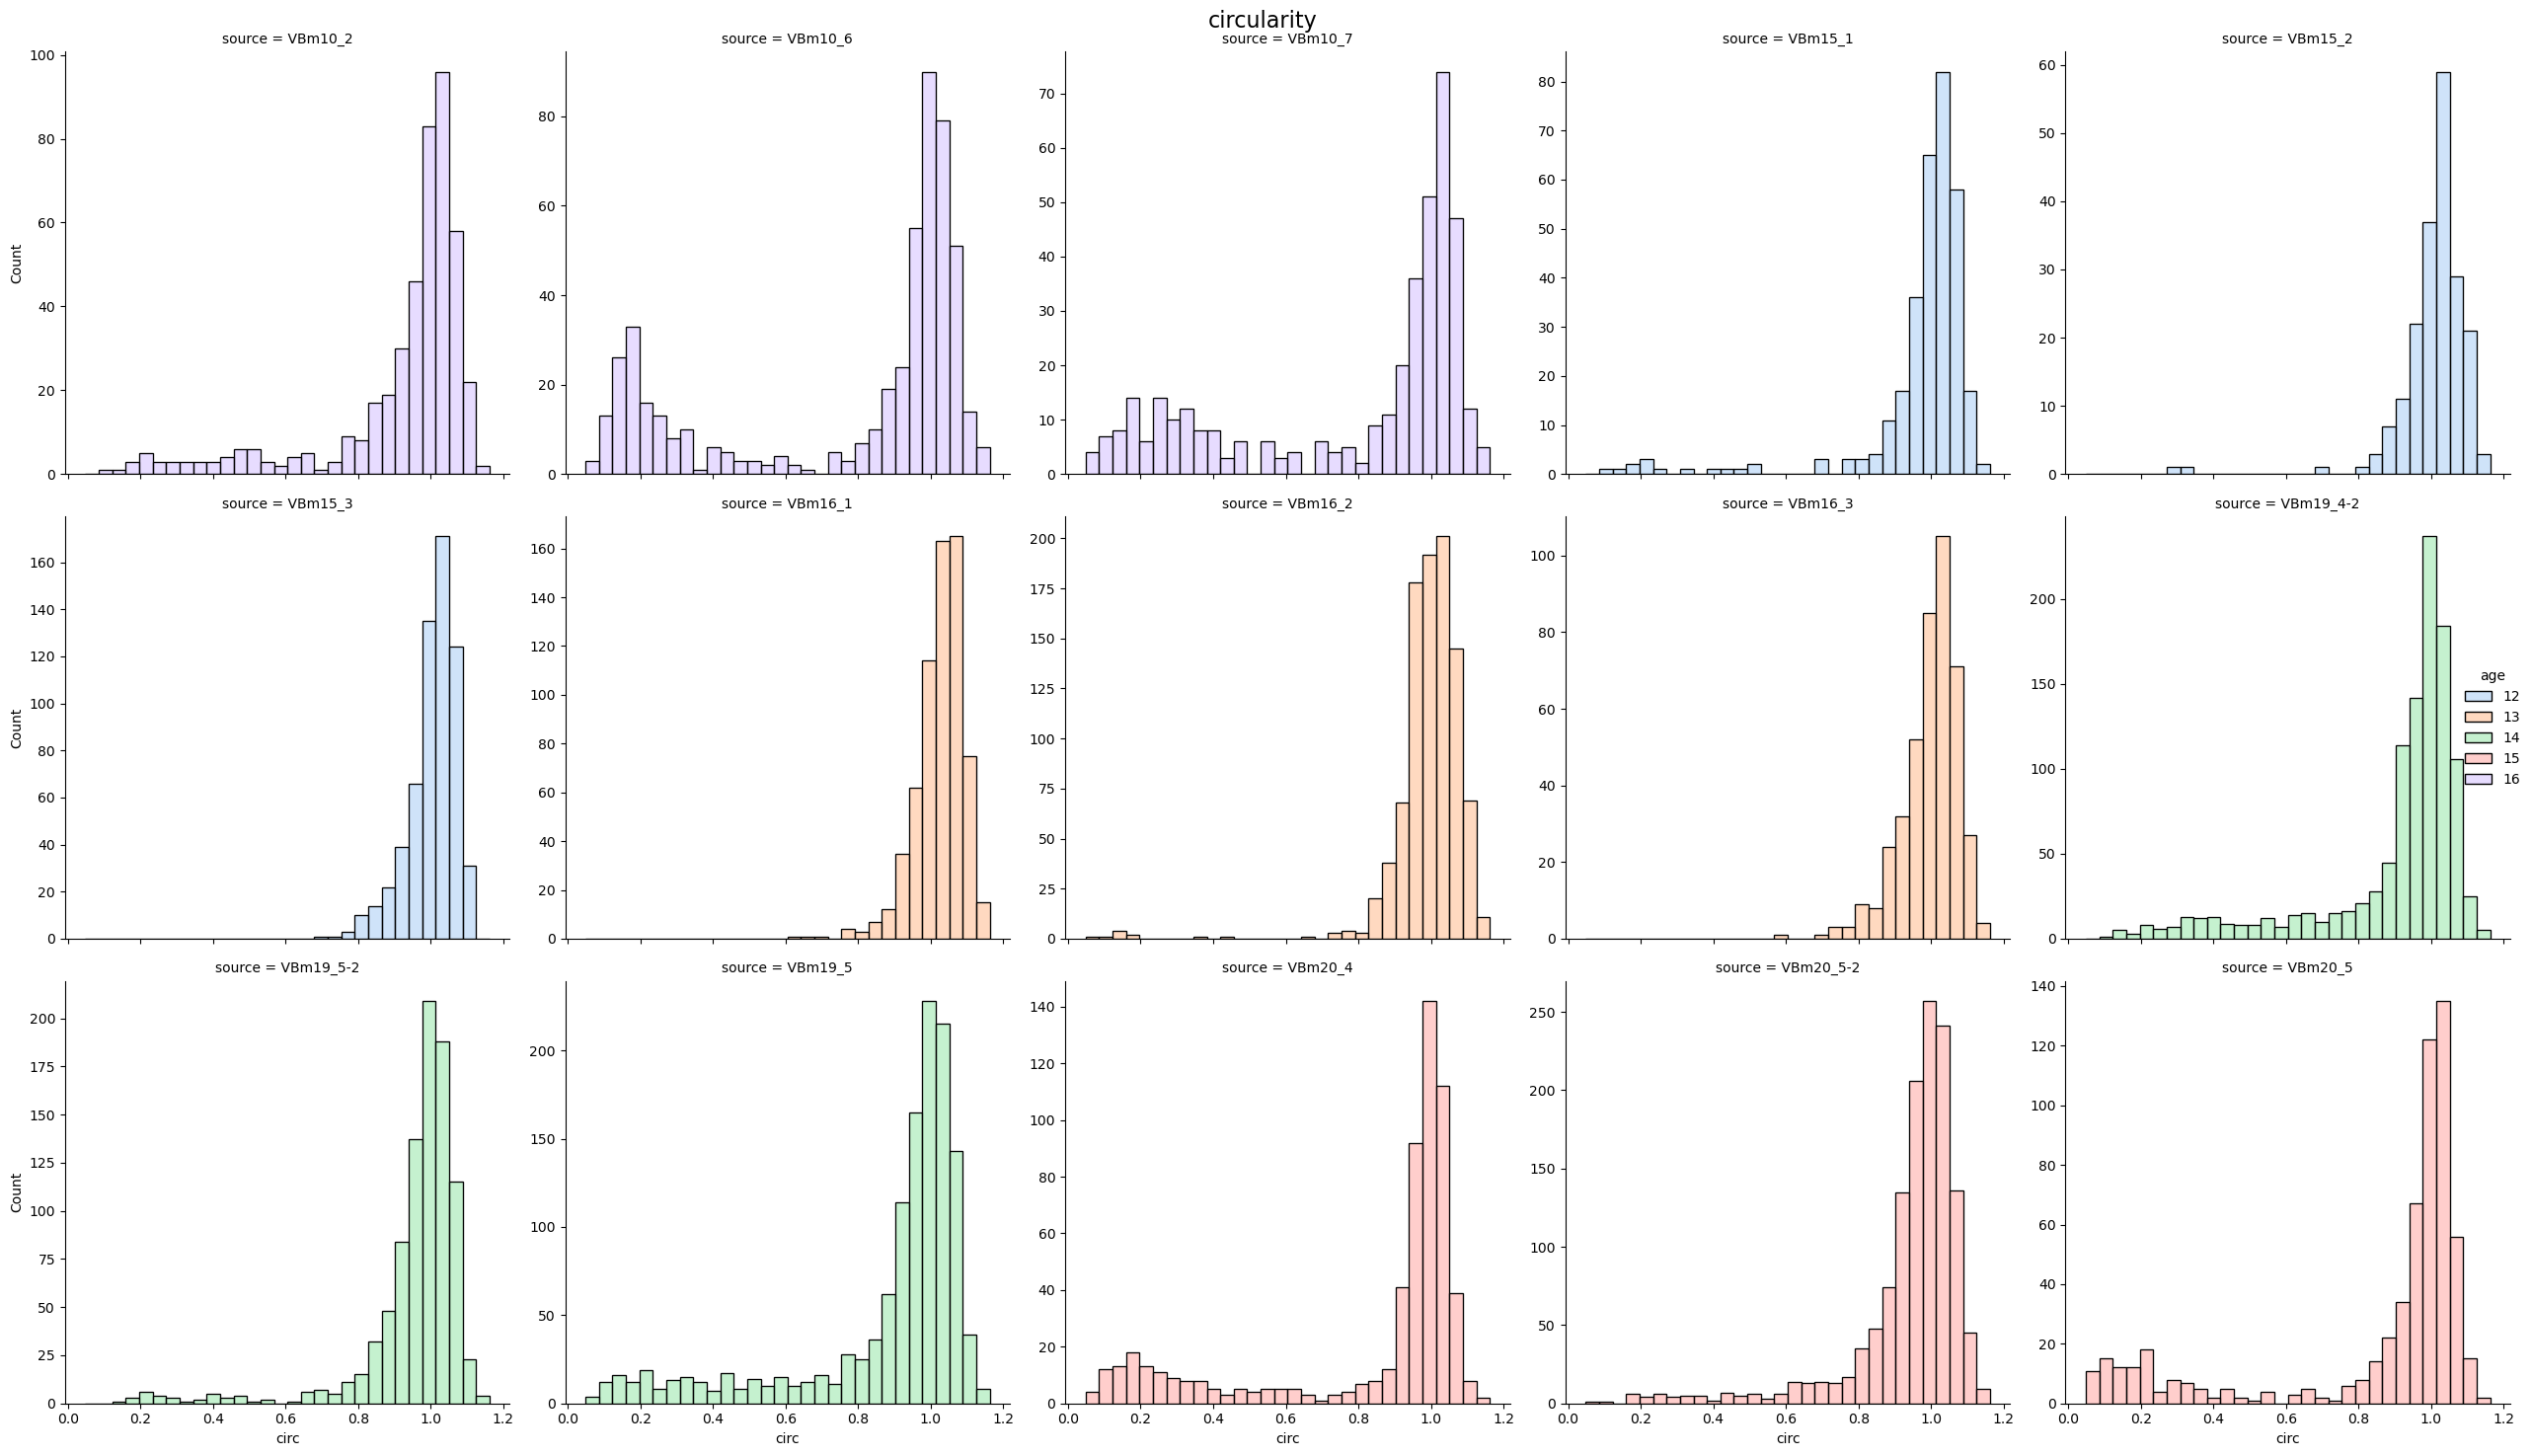

In [52]:
g = sns.displot(
    data=brdu_df_filt,
    x='circ',
    col='source',         # Facet by source
    bins=30,
    col_wrap = 5,
    hue = 'age',
    palette=qual_palette,
    facet_kws=dict(sharey=False)  # Optional: don't force same y-axis
)

g.fig.suptitle('circularity', fontsize=16)
plt.tight_layout()
plt.show()

### removing non circular cells (circularity > 0.7)

In [53]:
brdu_df_filt = brdu_df_filt[brdu_df_filt['circ'] > 0.7]

print(f'cells left: {len(brdu_df_filt)}')

cells left: 9232


In [54]:
brdu_df[brdu_df['source'] == 'VBm16_1'][brdu_df['label'] == 332]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16540\2000735779.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brdu_df[brdu_df['source'] == 'VBm16_1'][brdu_df['label'] == 332]


,label,area,perim,circ,intensity,layer,source,age
5705,332,274,58.870058,0.993508,207.912409,l5,VBm16_1,13


### filter by intensity (avg intensity > 150)

In [55]:
brdu_df_filt = brdu_df_filt[brdu_df_filt['intensity'] > 150]

print(f'cells left: {len(brdu_df_filt)}')

cells left: 2305


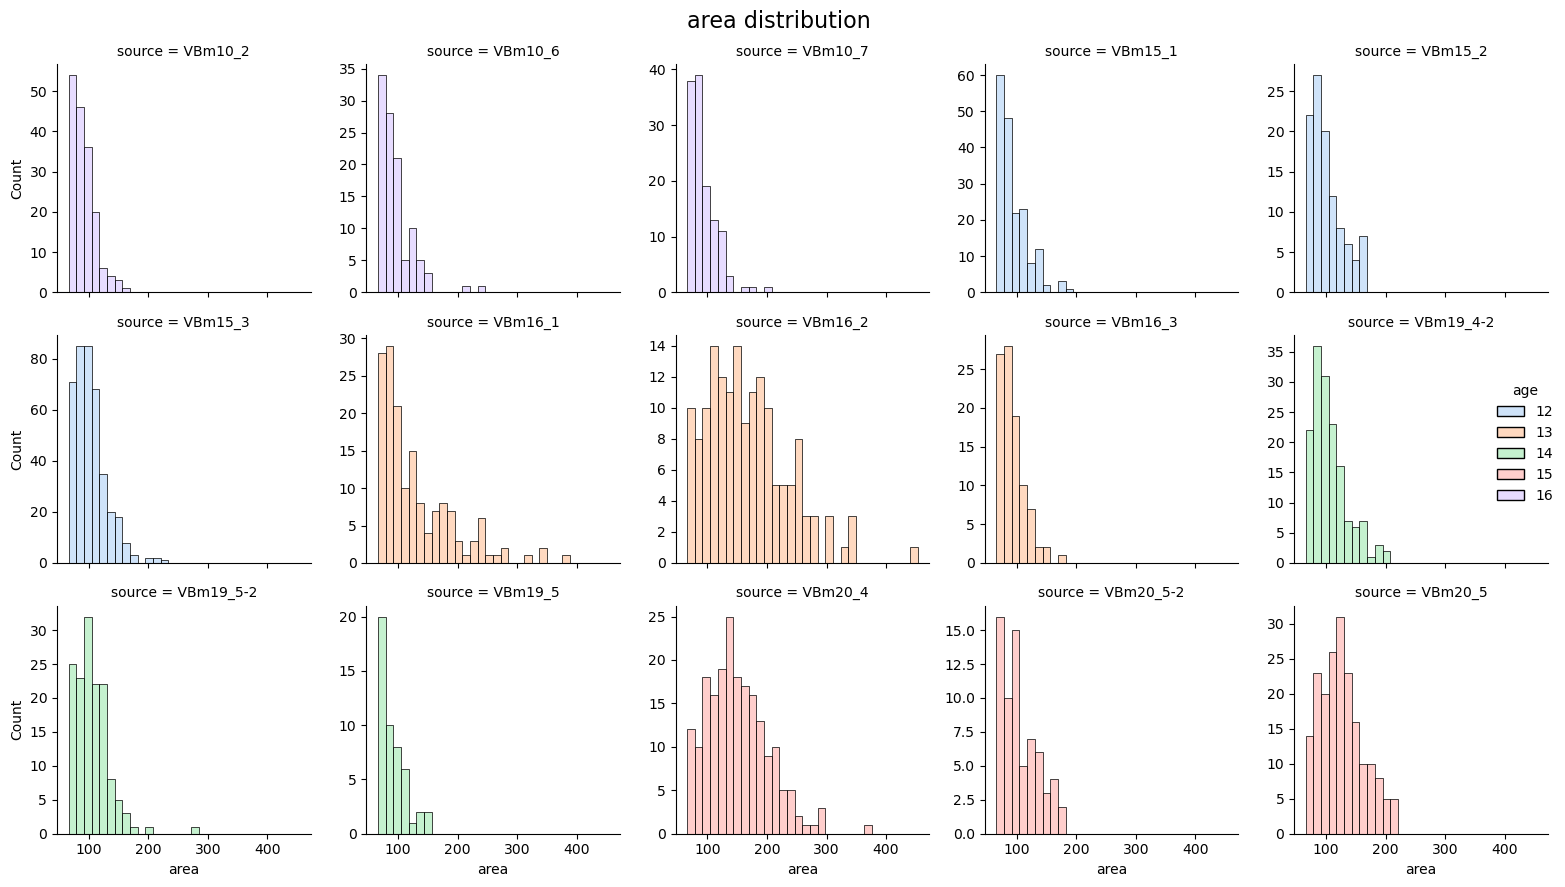

In [56]:
g = sns.displot(
    data=brdu_df_filt,
    x='area',
    col='source',         # Facet by source
    bins=30,
    col_wrap=5,           # Wrap into rows if too many
    height=3,             # Size of each facet
    hue = 'age',
    palette=qual_palette,
    facet_kws=dict(sharey=False)  # Optional: don't force same y-axis
)

g.fig.suptitle('area distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [57]:
brdu_df_filt = brdu_df_filt[brdu_df_filt['area'] < 300]

print(f'cells left: {len(brdu_df_filt)}')

cells left: 2292


In [58]:
brdu_df_filt.to_csv('supplementary/brdu_valid_cells.csv')

### keep only nuclei in layer ROIs

In [59]:
brdu_df_filt = brdu_df_filt[brdu_df_filt['layer'] != 'empty']
brdu_df_filt = brdu_df_filt.sort_values(by = 'layer')

print(len(brdu_df_filt))

1339


In [60]:
brdu_df_filt.groupby(['source']).size().reset_index(name='count')

,source,count
0,VBm10_2,4
1,VBm10_6,21
2,VBm10_7,32
3,VBm15_1,65
4,VBm15_2,52
5,VBm15_3,213
6,VBm16_1,118
7,VBm16_2,127
8,VBm16_3,77
9,VBm19_4-2,120


## visualization

In [61]:
print(brdu_df_filt[brdu_df_filt['age'] == 16])

      label  area      perim      circ   intensity layer   source  age
2297      2    81  31.556349  1.022166  244.938272    l1  VBm10_7   16
2298      3    91  33.556349  1.015551  253.670330    l1  VBm10_7   16
2299      4    75  28.727922  1.141991  236.946667    l1  VBm10_7   16
2335     40    68  28.727922  1.035405  217.470588    l1  VBm10_7   16
40       41    68  28.727922  1.035405  198.676471   l23  VBm10_2   16
1602    279    68  27.899495  1.097807  174.838235   l23  VBm10_6   16
1590    267    91  32.970563  1.051958  154.670330   l23  VBm10_6   16
1589    266   136  42.627417  0.940526  166.397059   l23  VBm10_6   16
1580    257    75  29.313708  1.096805  190.186667   l23  VBm10_6   16
1575    252    99  34.970563  1.017278  240.343434   l23  VBm10_6   16
1571    248    71  28.727922  1.081085  185.746479   l23  VBm10_6   16
1567    244    66  27.899495  1.065519  248.242424   l23  VBm10_6   16
1545    222    81  32.142136  0.985248  190.358025   l23  VBm10_6   16
1542  

<Axes: xlabel='layer', ylabel='count'>

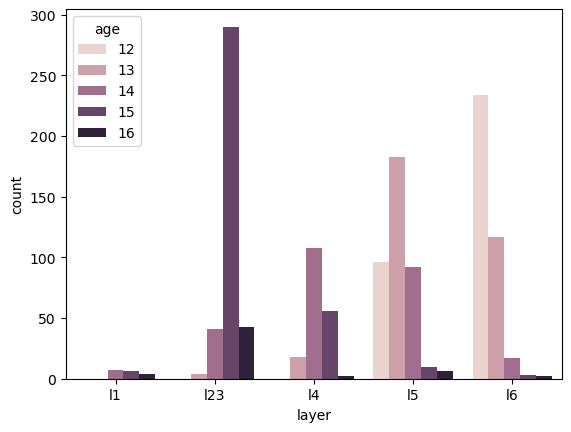

In [62]:
sns.countplot(data=brdu_df_filt, x='layer', hue='age')

In [63]:
print(brdu_df_filt[brdu_df_filt['age'] ==16])

      label  area      perim      circ   intensity layer   source  age
2297      2    81  31.556349  1.022166  244.938272    l1  VBm10_7   16
2298      3    91  33.556349  1.015551  253.670330    l1  VBm10_7   16
2299      4    75  28.727922  1.141991  236.946667    l1  VBm10_7   16
2335     40    68  28.727922  1.035405  217.470588    l1  VBm10_7   16
40       41    68  28.727922  1.035405  198.676471   l23  VBm10_2   16
1602    279    68  27.899495  1.097807  174.838235   l23  VBm10_6   16
1590    267    91  32.970563  1.051958  154.670330   l23  VBm10_6   16
1589    266   136  42.627417  0.940526  166.397059   l23  VBm10_6   16
1580    257    75  29.313708  1.096805  190.186667   l23  VBm10_6   16
1575    252    99  34.970563  1.017278  240.343434   l23  VBm10_6   16
1571    248    71  28.727922  1.081085  185.746479   l23  VBm10_6   16
1567    244    66  27.899495  1.065519  248.242424   l23  VBm10_6   16
1545    222    81  32.142136  0.985248  190.358025   l23  VBm10_6   16
1542  

In [64]:
counts = brdu_df_filt.groupby(['source', 'layer', 'age']).size().reset_index(name='count')
counts['percent'] = counts.groupby('source')['count'].transform(lambda x: x / x.sum())

sorted_layers = sorted(counts['layer'].unique())
counts['layer'] = pd.Categorical(counts['layer'], categories=sorted_layers, ordered=True)

print(counts)

       source layer  age  count   percent
0     VBm10_2   l23   16      3  0.750000
1     VBm10_2    l5   16      1  0.250000
2     VBm10_6   l23   16     19  0.904762
3     VBm10_6    l5   16      1  0.047619
4     VBm10_6    l6   16      1  0.047619
5     VBm10_7    l1   16      4  0.125000
6     VBm10_7   l23   16     21  0.656250
7     VBm10_7    l4   16      2  0.062500
8     VBm10_7    l5   16      4  0.125000
9     VBm10_7    l6   16      1  0.031250
10    VBm15_1    l5   12     25  0.384615
11    VBm15_1    l6   12     40  0.615385
12    VBm15_2    l5   12      3  0.057692
13    VBm15_2    l6   12     49  0.942308
14    VBm15_3    l5   12     68  0.319249
15    VBm15_3    l6   12    145  0.680751
16    VBm16_1   l23   13      2  0.016949
17    VBm16_1    l4   13      5  0.042373
18    VBm16_1    l5   13     78  0.661017
19    VBm16_1    l6   13     33  0.279661
20    VBm16_2   l23   13      2  0.015748
21    VBm16_2    l4   13      9  0.070866
22    VBm16_2    l5   13     76  0

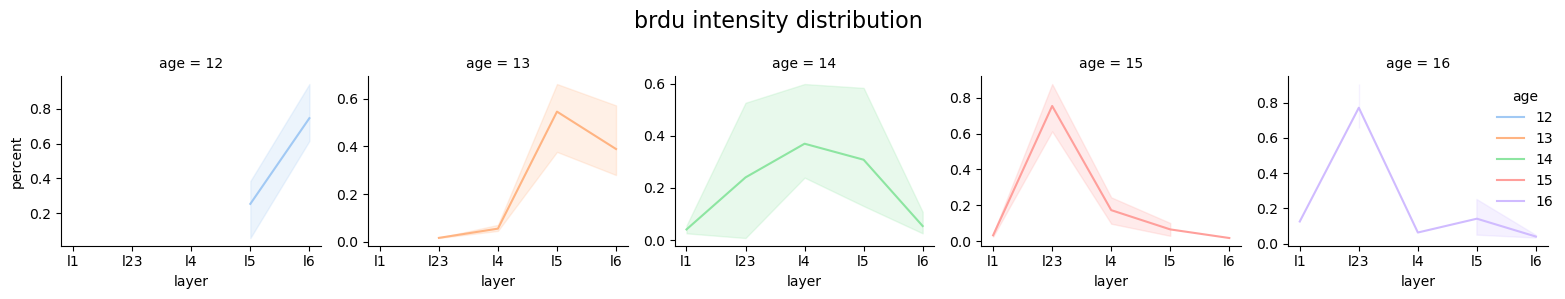

In [65]:
g = sns.relplot(
    data=counts,
    kind='line',
    x='layer',
    y='percent',
    col='age',         # Facet by source
    height=3,             # Size of each facet
    hue = 'age',
    palette=qual_palette,
    facet_kws=dict(sharey=False)
)

g.fig.suptitle('brdu intensity distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [68]:
print(counts[counts['age'] == 16])

    source layer  age  count   percent
0  VBm10_2   l23   16      3  0.750000
1  VBm10_2    l5   16      1  0.250000
2  VBm10_6   l23   16     19  0.904762
3  VBm10_6    l5   16      1  0.047619
4  VBm10_6    l6   16      1  0.047619
5  VBm10_7    l1   16      4  0.125000
6  VBm10_7   l23   16     21  0.656250
7  VBm10_7    l4   16      2  0.062500
8  VBm10_7    l5   16      4  0.125000
9  VBm10_7    l6   16      1  0.031250


In [66]:
mean_df = counts.groupby(['layer', 'age'])['percent'].mean().reset_index()

mean_df['percent'] = mean_df['percent'].fillna(0)

print(mean_df)

   layer  age   percent
0     l1   12  0.000000
1     l1   13  0.000000
2     l1   14  0.041195
3     l1   15  0.033480
4     l1   16  0.125000
5    l23   12  0.000000
6    l23   13  0.016349
7    l23   14  0.240522
8    l23   15  0.753689
9    l23   16  0.770337
10    l4   12  0.000000
11    l4   13  0.055062
12    l4   14  0.369552
13    l4   15  0.173617
14    l4   16  0.062500
15    l5   12  0.253852
16    l5   13  0.545355
17    l5   14  0.308234
18    l5   15  0.066358
19    l5   16  0.140873
20    l6   12  0.746148
21    l6   13  0.388683
22    l6   14  0.054229
23    l6   15  0.018405
24    l6   16  0.039435


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_16540\2065930625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = counts.groupby(['layer', 'age'])['percent'].mean().reset_index()


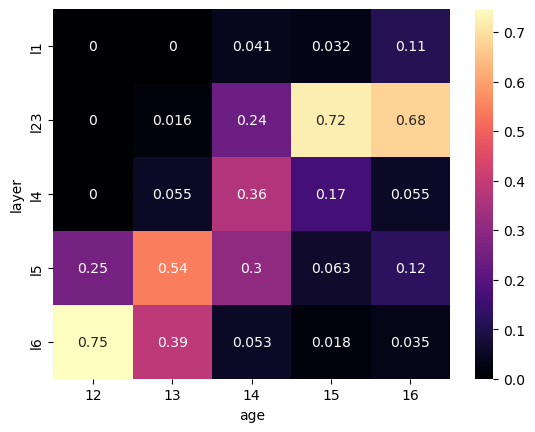

In [69]:
matrix_df = mean_df.pivot(index = 'layer', columns = 'age', values = 'percent')

matrix_df = matrix_df.divide(matrix_df.sum(axis=0), axis=1)

sns.heatmap(matrix_df.astype(float), annot=True, cmap="magma")
plt.show()

matrix_df.to_csv('supplementary/brdu_layer_matrix.csv')